### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp

#### Null hypothesis: Capstone recommender recommends just as well or better than Udemy's model (greater than or equal to)
#### Alternate hypothesis: Udemy's recommender recommends better than the capstone recommender (greater than)

Key:
* 1 = Udemy
* 2 = Capstone Recommender

### Read In File

In [2]:
#read in survey data with pandas
survey_df = pd.read_csv('D:/Capstone/A_B_test_number.csv')

In [3]:
#let's look at the data
survey_df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14
0,4/3/2023 7:47,4/3/2023 7:53,0,100,359,1,4/3/2023 7:53,R_2ahFpyWjxGvYHPl,anonymous,EN,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,"Generally, it seemed like recommendation for O...",5.0,Option B seemed to be less relevant to the job...
1,4/3/2023 8:30,4/3/2023 8:32,0,100,151,1,4/3/2023 8:32,R_2UYER7cWt6dhhnt,anonymous,EN,...,1.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
2,4/3/2023 8:35,4/3/2023 8:39,0,100,246,1,4/3/2023 8:39,R_ykX2xYDq5HKisRb,anonymous,EN,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,1.0,NaN
3,4/3/2023 9:14,4/3/2023 9:27,0,100,731,1,4/3/2023 9:27,R_1N49kVcsIKtw4uC,anonymous,EN,...,2.0,1.0,2.0,1.0,2.0,1.0,3.0,NaN,3.0,NaN
4,4/3/2023 9:14,4/3/2023 9:27,0,100,824,1,4/3/2023 9:27,R_DSGrn2UXbaTBJqV,email,EN,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,They seemed a bit broader than the B options. ...,2.0,They seemed to be narrower than A options. The...


In [4]:
#grab basic statistics for each column
survey_df.describe()

,Status,Progress,Duration (in seconds),Finished,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q13
count,53.0,53.000000,53.000000,53.000000,45.000000,45.000000,44.000000,43.000000,42.000000,42.000000,41.000000,40.000000,41.000000,40.000000,37.000000,36.000000
mean,0.0,81.905660,3860.981132,0.754717,1.111111,1.177778,1.363636,1.767442,1.214286,1.404762,1.390244,1.275000,1.804878,1.400000,2.432432,3.166667
std,0.0,33.993361,17883.469085,0.434372,0.317821,0.386646,0.486607,0.427463,0.415300,0.496796,0.493865,0.452203,0.401218,0.496139,1.365051,1.521278
min,0.0,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0,100.000000,152.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,0.0,100.000000,260.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000
75%,0.0,100.000000,483.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000
max,0.0,100.000000,98744.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000


In [5]:
len(survey_df)

53

In [6]:
#check for null values in the dataset
survey_df.isnull().sum()

StartDate                 0
EndDate                   0
Status                    0
Progress                  0
Duration (in seconds)     0
Finished                  0
RecordedDate              0
ResponseId                0
DistributionChannel       0
UserLanguage              0
Q1                        8
Q2                        8
Q3                        9
Q4                       10
Q5                       11
Q6                       11
Q7                       12
Q8                       13
Q9                       12
Q10                      13
Q11                      16
Q12                      36
Q13                      17
Q14                      36
dtype: int64

### Grab all A/B question columns and create array's

In [7]:
#copy survey df to make changes
df = survey_df.copy()

In [8]:
#grab all of the rows with A/B choices
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]

In [9]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
1,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
2,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
3,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
4,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
5,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
6,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
7,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
8,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
9,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0


In [10]:
len(df)

53

In [11]:
#check for null values in the targeted survey rows
df.isnull().sum()

Q1      8
Q2      8
Q3      9
Q4     10
Q5     11
Q6     11
Q7     12
Q8     13
Q9     12
Q10    13
dtype: int64

In [12]:
#drop rows with no values
df = df.drop([41,43,44,45,46,47,51,52])

In [13]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
1,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
2,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
3,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
4,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
5,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
6,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
7,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
8,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
9,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0


In [14]:
#fill in na values with 0 so that we can still account for answers that were selected
df = df.fillna(0)

In [15]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
1,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
2,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
3,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
4,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
5,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
6,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
7,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
8,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
9,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0


In [16]:
len(df)

45

In [17]:
#grab all of the ones from each coloumn and make it a list
Q1_1 = df.loc[df['Q1']==1]['Q1']
Q2_1 = df.loc[df['Q2']==1]['Q2']
Q3_1 = df.loc[df['Q3']==1]['Q3']
Q4_1 = df.loc[df['Q4']==1]['Q4']
Q5_1 = df.loc[df['Q5']==1]['Q5']
Q6_1 = df.loc[df['Q6']==1]['Q6']
Q7_1 = df.loc[df['Q7']==1]['Q7']
Q8_1 = df.loc[df['Q8']==1]['Q8']
Q9_1 = df.loc[df['Q9']==1]['Q9']
Q10_1 = df.loc[df['Q10']==1]['Q10']

In [18]:
#check length of all selections of one
print(len(Q1_1))
print(len(Q2_1)) 
print(len(Q3_1)) 
print(len(Q4_1)) 
print(len(Q5_1)) 
print(len(Q6_1)) 
print(len(Q7_1)) 
print(len(Q8_1))
print(len(Q9_1))
print(len(Q10_1))

40
37
28
10
33
25
25
29
8
24


In [19]:
#grab all of the twoa from each coloumn and make it a list
Q1_2 = df.loc[df['Q1']==2]['Q1']
Q2_2 = df.loc[df['Q2']==2]['Q2']
Q3_2 = df.loc[df['Q3']==2]['Q3']
Q4_2 = df.loc[df['Q4']==2]['Q4']
Q5_2 = df.loc[df['Q5']==2]['Q5']
Q6_2 = df.loc[df['Q6']==2]['Q6']
Q7_2 = df.loc[df['Q7']==2]['Q7']
Q8_2 = df.loc[df['Q8']==2]['Q8']
Q9_2 = df.loc[df['Q9']==2]['Q9']
Q10_2 = df.loc[df['Q10']==2]['Q10']

In [20]:
#check length of all selections of two
print(len(Q1_2))
print(len(Q2_2)) 
print(len(Q3_2)) 
print(len(Q4_2)) 
print(len(Q5_2)) 
print(len(Q6_2)) 
print(len(Q7_2)) 
print(len(Q8_2))
print(len(Q9_2))
print(len(Q10_2))

5
8
16
33
9
17
16
11
33
16


In [21]:
#make an array of the total times option one was selected for each question
ones_total = np.array([40,37,28,10,33,25,25,29,8,24])

In [22]:
np.mean(ones_total)

25.9

In [23]:
#make an array of the total times option two was selected for each question
twos_total = np.array([5,8,16,33,9,17,16,11,33,16])

In [25]:
np.mean(twos_total)

16.4

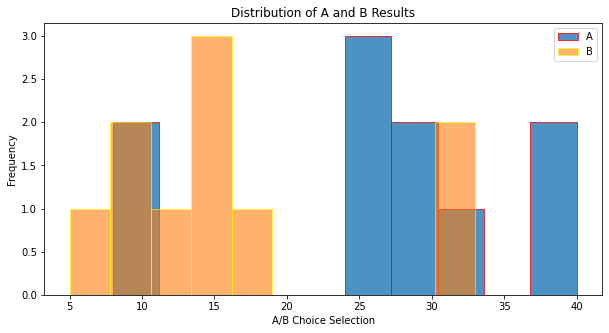

In [30]:
#create figure
fig, ax = plt.subplots(1, figsize = (10,5))

#add title and x/y labels
ax.set_title('Distribution of A and B Results')
ax.set_xlabel('A/B Choice Selection')
ax.set_ylabel('Frequency')

#plot results
ax.hist(ones_total, alpha = .8, edgecolor='red')
ax.hist(twos_total, alpha = .6, edgecolor='yellow')

#add legend
ax.legend(('A', 'B'), loc='upper right')

### Run Ttest

In [33]:
#run a ttest on both array's
res = ttest_ind(ones_total, twos_total, alternative = 'greater', equal_var = False)

In [34]:
#look at the results of the ttest
print(res)

Ttest_indResult(statistic=2.123497898342687, pvalue=0.023953151419551257)
